Proyek Analisis Data : Bike Sharing Dataset



*   Nama: Rizky Andini
*   Email:mc622d5x1806@student.devacademy.id
*   ID Dicoding:mc622d5x180





Menentukan pertanyaan Bisnis


*   Bagaimana pola jumlah penyewaan sepeda berdasarkan musim?
*   Pada jam berapa jumlah penyewaan sepeda paling tinggi?



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [13]:
#Load dataset
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

Data Wrangling

In [16]:
#Tampilan info dataset
print("Informasi dataset 'day.csv':")
df_day.info()
print("\nInformasi dataset 'hour.csv':")
df_hour.info()


Informasi dataset 'day.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Informasi dataset 'hour.csv':
<class 'pandas.core.frame.DataFra

In [17]:
#Tampilan beberapa data awal

print("\n5 Data Pertama 'day.csv':")
print(df_day.head())

print("\n5 Data Pertama 'hour.csv':")
print(df_hour.head())


5 Data Pertama 'day.csv':
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

In [18]:
#Cek mising values

print("\nCek Missing Values:")
print(df_day.isnull().sum(), "\n")
print(df_hour.isnull().sum())


Cek Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [19]:
#Cek duplikasi

print("\nCek Duplikasi:")
print(df_day.duplicated().sum(), "\n")
print(df_hour.duplicated().sum())


Cek Duplikasi:
0 

0


In [20]:
#Konversi kolom tanggal ke format datatime

df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

Exploratory Data Analysis (EDA)

In [21]:
#Statik deskripsi

print("\nStatistik Deskriptif 'day.csv':")
print(df_day.describe())

print("\nStatistik Deskriptif 'hour.csv':")
print(df_hour.describe())


Statistik Deskriptif 'day.csv':
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    

In [23]:
#korelasi antar variabel

print("\nKorelasi Antar Variabel 'day.csv':")
print(df_day.corr())

print("\nKorelasi Antar Variabel 'hour.csv':")
print(df_hour.corr())


Korelasi Antar Variabel 'day.csv':
             instant    dteday    season        yr      mnth   holiday  \
instant     1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
dteday      1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
season      0.412224  0.412224  1.000000 -0.001844  0.831440 -0.010537   
yr          0.866025  0.866025 -0.001844  1.000000 -0.001792  0.007954   
mnth        0.496702  0.496702  0.831440 -0.001792  1.000000  0.019191   
holiday     0.016145  0.016145 -0.010537  0.007954  0.019191  1.000000   
weekday    -0.000016 -0.000016 -0.003080 -0.005461  0.009509 -0.101960   
workingday -0.004337 -0.004337  0.012485 -0.002013 -0.005901 -0.253023   
weathersit -0.021477 -0.021477  0.019211 -0.048727  0.043528 -0.034627   
temp        0.150580  0.150580  0.334315  0.047604  0.220205 -0.028556   
atemp       0.152638  0.152638  0.342876  0.046106  0.227459 -0.032507   
hum         0.016375  0.016375  0.205445 -0.110651  0.222204 -0.015937   
wi

Visualization & Explanatory Analysis

Text(0.5, 1.0, 'Distribusi Jumlah Penyewaan Sepeda (cnt)')

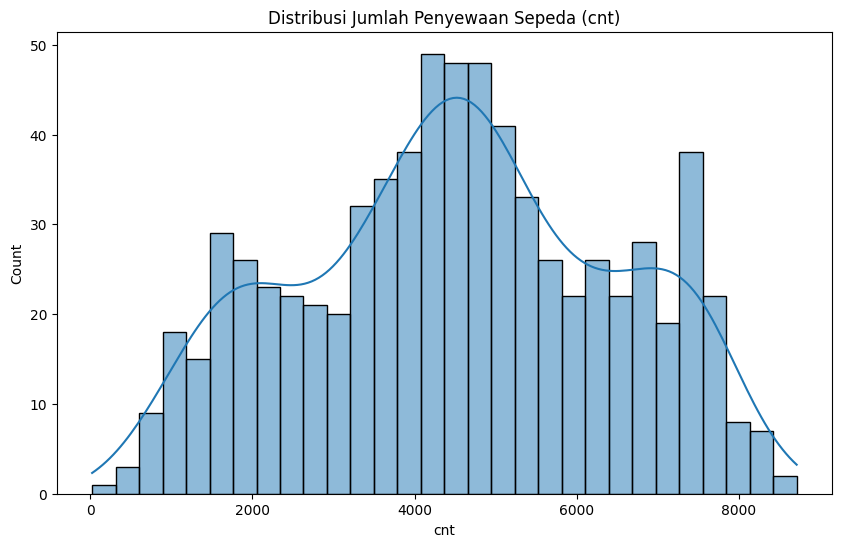

In [28]:
#distribusi jumlah penyewaan sepeda (cnt)

plt.figure(figsize=(10, 6))
sns.histplot(df_day['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda (cnt)')

Bagaimana pola jumlah penyewaan sepeda berdasarkan musim?

Text(0.5, 1.0, 'Penyewaan Sepeda Berdasarkan Musim')

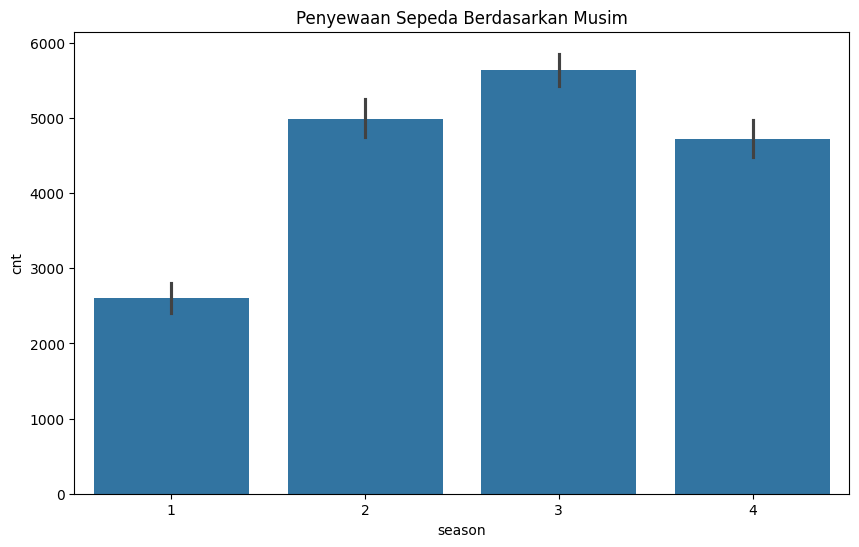

In [29]:
#penyewaan sepeda berdasarkan musim

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=df_day)
plt.title('Penyewaan Sepeda Berdasarkan Musim')

Text(0.5, 1.0, 'Tren Jumlah Penyewaan Sepeda Harian')

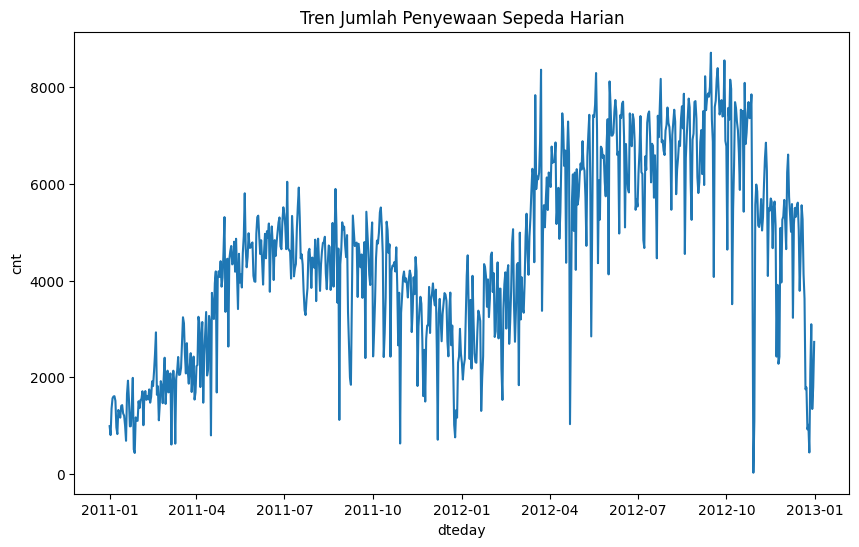

In [32]:
#tren jumlah penyewaan sepeda harian

plt.figure(figsize=(10, 6))
sns.lineplot(x='dteday', y='cnt', data=df_day)
plt.title('Tren Jumlah Penyewaan Sepeda Harian')

Pada jam berapa jumlah penyewaan sepeda paling tinggi?

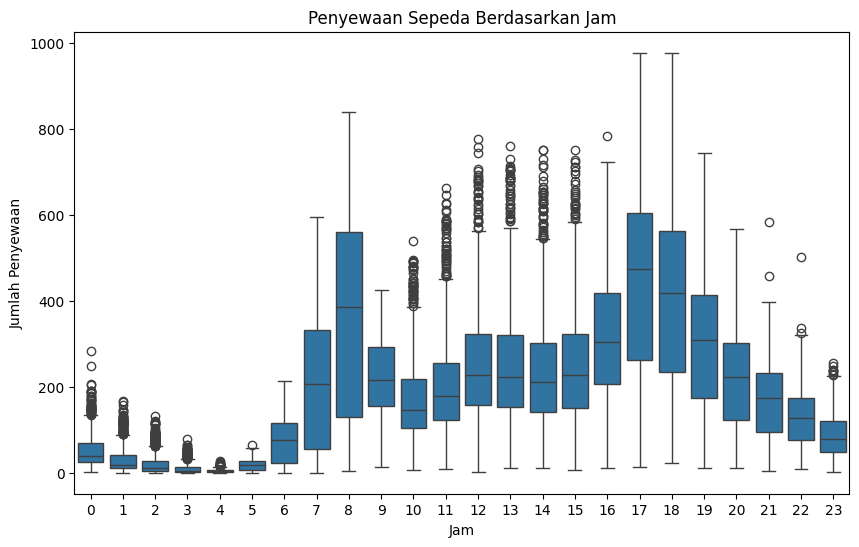

In [34]:
#penyewaan sepeda berdasarkan jam (hour.csv)

plt.figure(figsize=(10, 6))
sns.boxplot(x='hr', y='cnt', data=df_hour)
plt.title("Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.show()

Text(0.5, 1.0, 'Penyewaan Sepeda Berdasarkan Hari Kerja vs Libur')

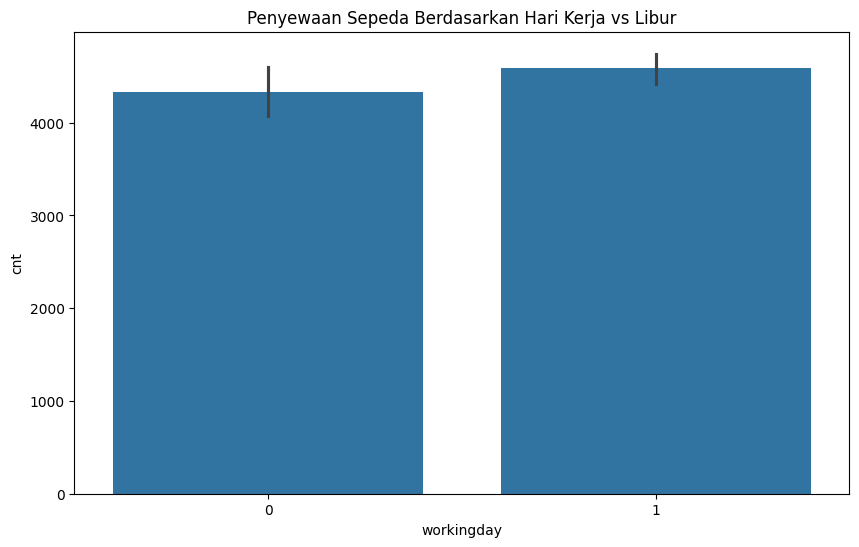

In [35]:
#penyewaan sepeda berdasarkan hari kerja vs libur

plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=df_day)
plt.title('Penyewaan Sepeda Berdasarkan Hari Kerja vs Libur')

Conslusion

*   Berdasarkan analisis data, ditemukan bahwa penyewaan sepeda dipengaruhi oleh musim dan waktu dalam sehari.
Pada analisis berdasarkan musim, jumlah penyewaan sepeda tertinggi terjadi pada musim gugur (Fall), kemungkinan karena cuaca yang lebih nyaman. Sebaliknya, musim semi (Spring) memiliki jumlah penyewaan paling rendah, kemungkinan karena cuaca yang lebih dingin atau curah hujan lebih tinggi. Oleh karena itu, strategi bisnis yang dapat diterapkan adalah menyediakan lebih banyak sepeda saat musim gugur serta meningkatkan promosi atau diskon pada musim semi untuk menarik lebih banyak pelanggan
*   Sementara itu, pada analisis berdasarkan jam, penyewaan sepeda meningkat signifikan pada jam sibuk, yaitu 07:00 - 09:00 pagi dan 17:00 - 19:00 sore, yang menunjukkan bahwa banyak pengguna menggunakan sepeda untuk berangkat dan pulang kerja. Sebaliknya, penyewaan menurun drastis pada malam hari (00:00 - 05:00) karena lebih sedikit aktivitas. Berdasarkan pola ini, pengelola layanan dapat menyediakan lebih banyak sepeda pada jam sibuk dan menawarkan promosi khusus pada jam-jam sepi untuk meningkatkan jumlah penyewaan.



In [36]:
from google.colab import files

files.download("day.csv")
files.download("hour.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>